# Imports and setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df = pd.read_csv('/kaggle/input/poland-cars-for-sale-dataset/Car_sale_ads.csv')
df = pd.read_csv('Car_sale_ads.csv')

In [ ]:
df.head

<bound method NDFrame.head of          Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0            0  86200      PLN       New        Abarth           595   
1            1  43500      PLN      Used        Abarth         Other   
2            2  44900      PLN      Used        Abarth           500   
3            3  39900      PLN      Used        Abarth           500   
4            4  97900      PLN       New        Abarth           595   
...        ...    ...      ...       ...           ...           ...   
208299  208299  39900      PLN      Used           Żuk         Other   
208300  208300  10900      PLN      Used           Żuk         Other   
208301  208301   6900      PLN      Used           Żuk         Other   
208302  208302   5700      PLN      Used           Żuk         Other   
208303  208303  11900      PLN      Used           Żuk         Other   

       Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0                  NaN    

# Cleaning Data

## **Part 1: Identifying missing data**

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

We can observe many non-null entries, but that does not mean the entries are actually empty.

### *Introducing missingno*

In [ ]:
%pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno

Missingno is a Python library that visualizes missing data in pandas dataframe.

("[Missingno] Allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset"). — Missingno Documentation

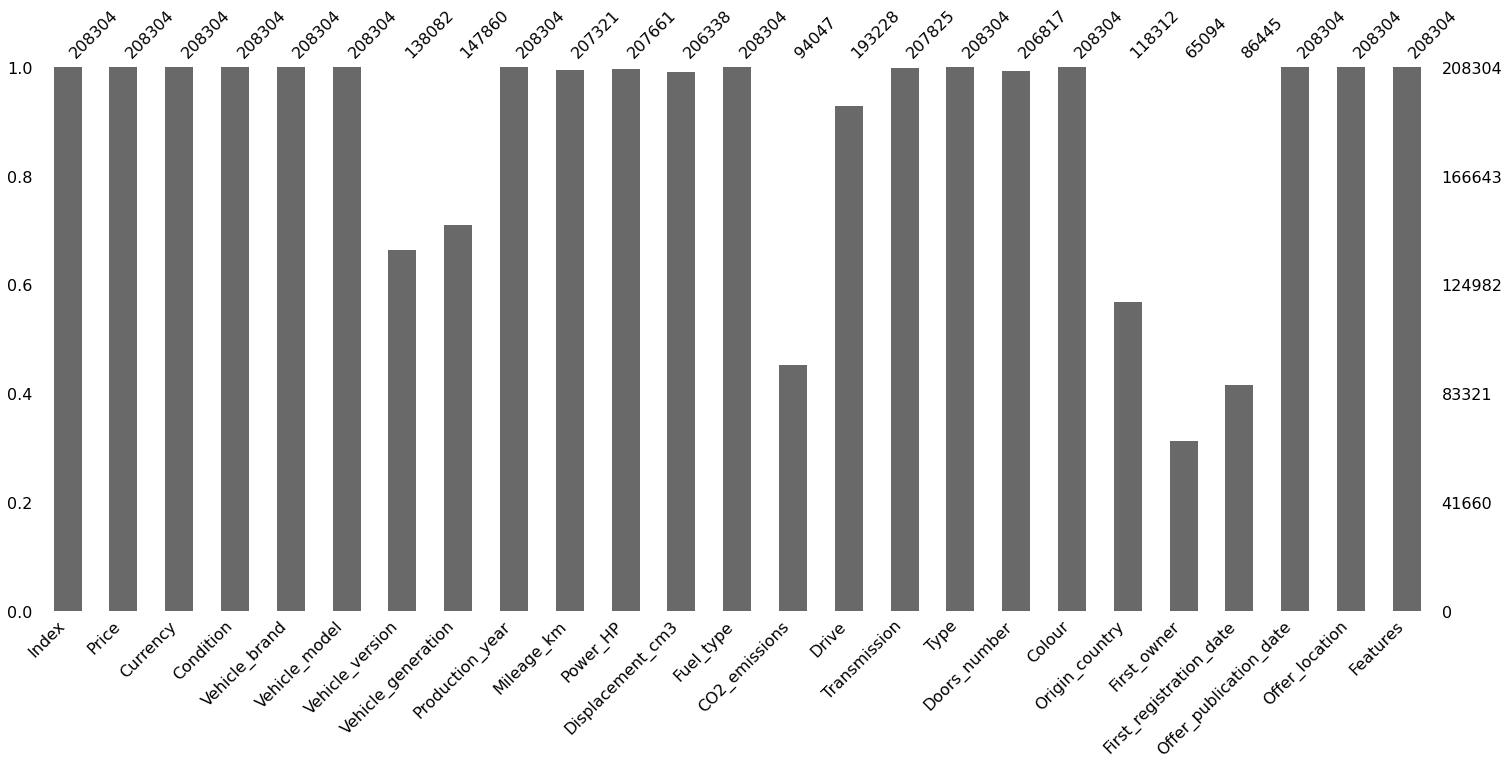

In [ ]:
msno.bar(df)

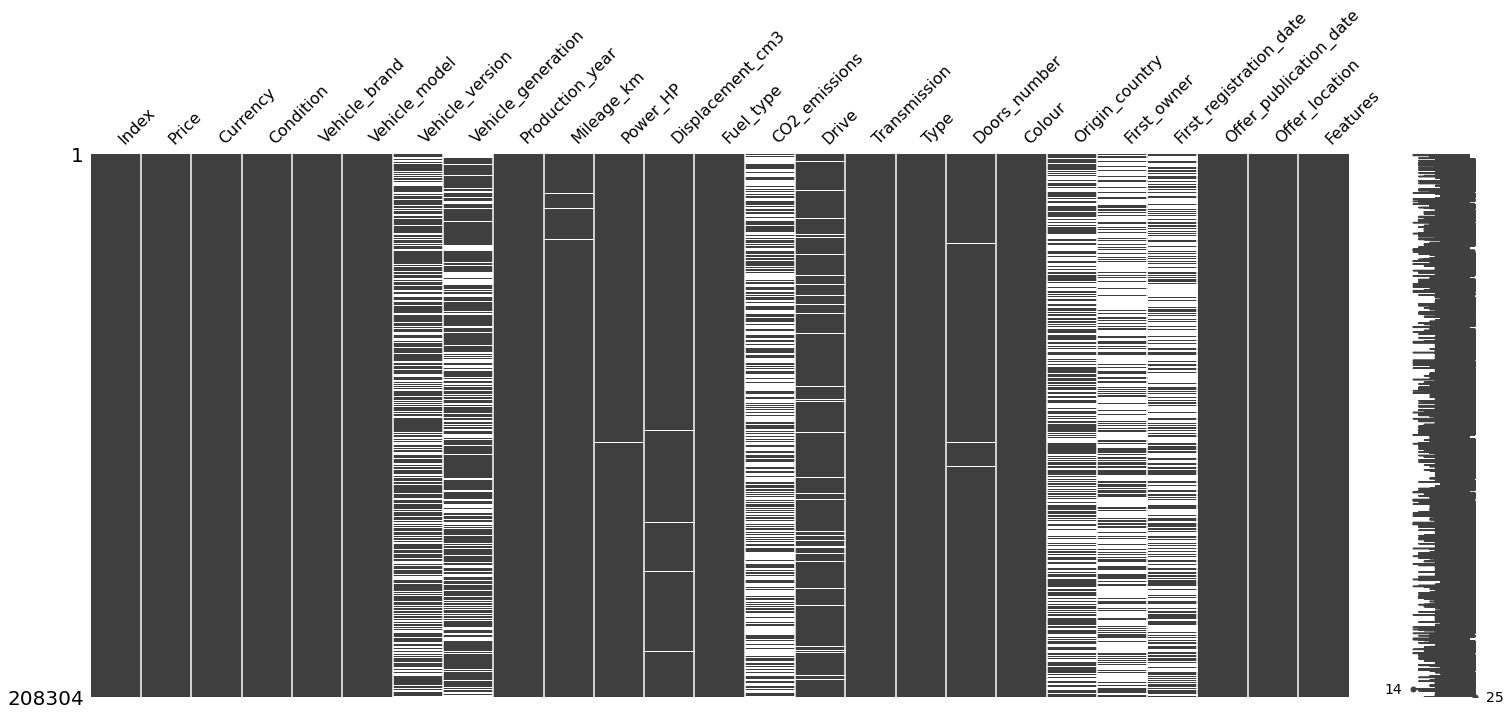

In [ ]:
msno.matrix(df)

Matrix column also shows if you have missing data in a big clump for example or missing all over the data.

As we can see from this plot, the latter is true in our case.


## **Part 2: Handling missing data**

The previous section indicates that we can deduce:

*1) The following columns contain the most null values:*

'First_owner', 'Vehicle_version', 'Vehicle_generation', 'Origin_country', 'CO2_emissions', 'Drive', 'First_registration_date'

*2) The following columns contain _some_ null values:*

'Mileage_km', 'Power_HP', 'Displacement_cm3', 'Transmission', 'Doors_number'

When it comes to the **first** group of columns, there are too many null values for us to fill in the rest. It would be best to simply drop the colums.

**HOWEVER**, not all columns are created equal.

Some columns are important for later analysis therefore cannot be dropped, like 'Origin_country' and 'CO2_emissions'

As for the second group, the missing values are not enough to warrant an entire column drop. Those values could be filled in (univariate imputation).

Mileage_km, Power_HP and Displacement_cm3 can all be filled by the mean OR mode.

Why? because the missing values make up less than 2-3% of the total amount of values.

In [ ]:
df['Mileage_km'].describe()


count    2.073210e+05
mean     1.502768e+05
std      2.937447e+06
min      1.000000e+00
25%      5.300000e+04
50%      1.445660e+05
75%      2.060000e+05
max      1.111111e+09
Name: Mileage_km, dtype: float64

In [ ]:
df['Power_HP'].describe()


count    207661.000000
mean        151.836281
std          77.683546
min           1.000000
25%         105.000000
50%         136.000000
75%         172.000000
max        1398.000000
Name: Power_HP, dtype: float64

In [ ]:
df['Displacement_cm3'].describe()

count    206338.000000
mean       1882.567147
std         729.609660
min         400.000000
25%        1461.000000
50%        1798.000000
75%        1997.000000
max        8400.000000
Name: Displacement_cm3, dtype: float64

Based on the previous results, it would be best to fill in with mode because the data is heavily skewed to its mode.

In [ ]:
df['Mileage_km'].fillna(value=df['Mileage_km'].mode()[0], inplace=True)
df['Power_HP'].fillna(value=df['Power_HP'].mode()[0], inplace=True)
df['Displacement_cm3'].fillna(value=df['Displacement_cm3'].mode()[0], inplace=True)


In [ ]:
#df.drop(['Vehicle_version'], axis=1, inplace=True)
#df.drop(['First_owner'], axis=1, inplace=True)
#df.drop(['Vehicle_generation'], axis=1, inplace=True)
#df.drop(['First_registration_date'], axis=1, inplace=True)
df.drop(['Drive'], axis=1, inplace=True)


In [ ]:
df.isna().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions              114257
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

## **Part 3: Outliers and formatting**

### Number of doors: any unrealistic outliers?

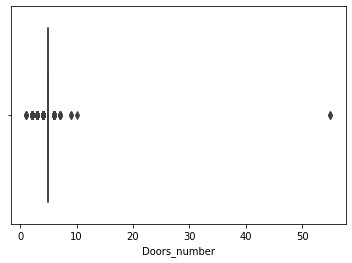

In [ ]:
sns.boxplot(x=df['Doors_number']);

Yes. It's impossible to have a 50+ door car. It must've been a typo.

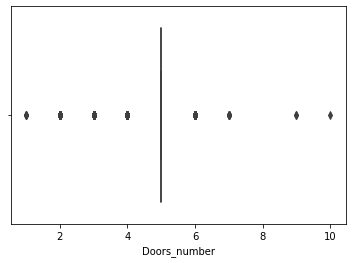

In [ ]:
sns.boxplot(x=df['Doors_number'][(df['Doors_number']<11)]);
#Much more realistic Box plot of car doors.

### Co2 emissions: any unrealistic outliers?


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


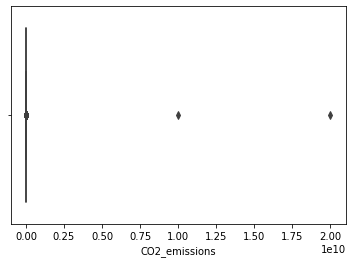

In [ ]:
sns.boxplot(df['CO2_emissions']);

In [ ]:
df['CO2_emissions'].describe()

count    9.404700e+04
mean     3.191564e+05
std      7.291396e+07
min      1.000000e+00
25%      1.200000e+02
50%      1.400000e+02
75%      1.640000e+02
max      2.000000e+10
Name: CO2_emissions, dtype: float64

Yes, 2.000000e+10 is practically impossible to reach by a car.

### Handling Currency

In [ ]:
df['Currency'].unique()

array(['PLN', 'EUR'], dtype=object)

For the sake of uniformity, it is best to only have one currency.

Which currency should we choose?

I'm going to convert all  to euros as it is more commonly used and as we'll see later, most brands are European.

Figuring out the exchange rates:

In [ ]:
df['Offer_publication_date'] = pd.to_datetime(df['Offer_publication_date'], infer_datetime_format=True,
                                                errors='coerce')
#Can't use dt without converting the object Offer_publication_date to datetime.

In [ ]:
df['Offer_publication_date'].dt.year.value_counts()

2021.0    103356
Name: Offer_publication_date, dtype: int64

This means that all data possess the same year of publication which makes things easier.

In [ ]:
df['Offer_publication_date'].dt.month.value_counts()

3.0     26562
2.0     26148
4.0     25902
1.0     24631
5.0        41
7.0        13
12.0       12
6.0        11
10.0       11
8.0         9
9.0         8
11.0        8
Name: Offer_publication_date, dtype: int64

For the sake of simplicity, we'll only deal with the first 4 months of 2021 as they are the most used

Average rate of first 4 months:

In [ ]:
from statistics import mean

exchange_rates = [4.53316, 4.54981, 4.51981, 4.5728]
avg_exchange_rate = mean(exchange_rates)

df[(df['Currency'] == 'PLN')]['Price'] = df[(df['Currency'] == 'PLN')]['Price'] * avg_exchange_rate

<ipython-input-90-ceeed8208316>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['Currency'] == 'PLN')]['Price'] = df[(df['Currency'] == 'PLN')]['Price'] * avg_exchange_rate


In [ ]:
df['Currency'].value_counts()

PLN    208034
EUR       270
Name: Currency, dtype: int64

### Features

For this colum, the features are written together as text. Some entries are empty, which does not mean the car comes without features.

The issue here is that they are grouped together in different formats.

One course of action would be to split every unique entry into a new column, and give the row values ranging from 'has' to 'doesn't have'.

This option is very computanionally demanding and would massively increase column sizes. On a larger dataset it would be practically impossible to implement.

Option 2 is to drop the column altogether knowing that it contains a lot of missing values and acknowledging that it is an important factor.

### Offer location

In [ ]:
df['Offer_location'].value_counts()

Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)    1329
Radom, Mazowieckie                               1207
Kielce, Świętokrzyskie                           1112
Lublin, Lubelskie                                1082
Bydgoszcz, Kujawsko-pomorskie                     902
                                                 ... 
Stawno, kamieński, Zachodniopomorskie               1
Przydwórz, wąbrzeski, Kujawsko-pomorskie            1
Stary Lubotyń, ostrowski, Mazowieckie               1
Korbielów, żywiecki, Śląskie                        1
Chęciny, garwoliński, Mazowieckie                   1
Name: Offer_location, Length: 13635, dtype: int64

It is evident there are formatting inconsistencies here.

For example, "Mazowieckie" is mentioned in multiple entries, yet each entry is considered unique, as if it's a different place.

# Data exploration

### Price

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


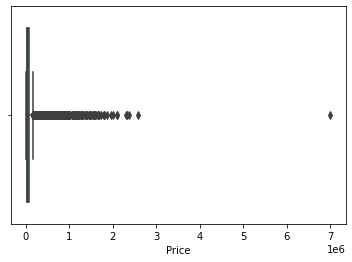

In [ ]:
sns.boxplot(df['Price']);

Outlier at 700k PLN, which is presumably not an error as car prices can exceed that number.

### Condition

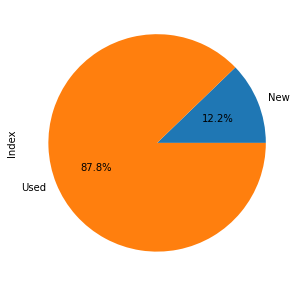

In [ ]:
df.groupby('Condition')['Index'].count().plot.pie(figsize=(5,5),autopct="%1.1f%%")

### Country of origin

A sequential map would work well here too

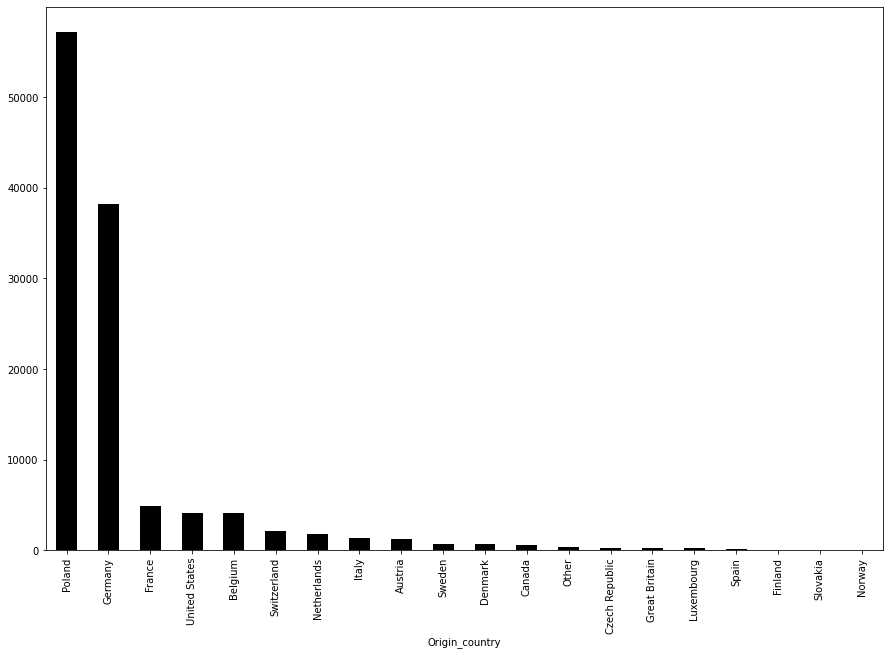

In [ ]:
df.groupby('Origin_country')['Index'].count().sort_values(ascending=False).head(20).plot.bar(figsize=(15,10))

As we can see, the top 18 out of 20 origin countries are European (as in exist on the European continent) - will be useful later.

### Colour

In [ ]:
df['Colour'].value_counts()

black       50355
gray        31826
silver      30886
white       30412
blue        21707
other       13805
red          9799
brown        5547
green        3633
burgundy     3442
golden       2677
beige        2488
yellow        961
violet        766
Name: Colour, dtype: int64

In [ ]:
colors = ["#000000", "#808080","#C0C0C0","#FFFFFF","#0000FF","#30D5C8","#FF0000","#964B00","#00FF00","#800020","#FFD700","#F5F5DC","#FFFF00","#8F00FF"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

In [ ]:
sns.countplot(y=df['Colour'],palette=customPalette,  order=df['Colour'].value_counts().index);


NameError: ignored

###Car Brands

Top 10 brands:

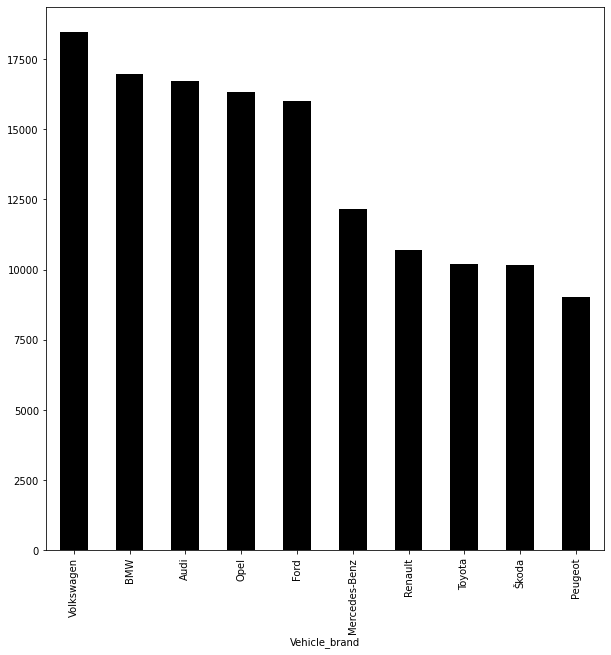

In [ ]:
df.groupby('Vehicle_brand')['Index'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,10))

Notice again how they're all European brands except for Ford and Toyota.

###Model

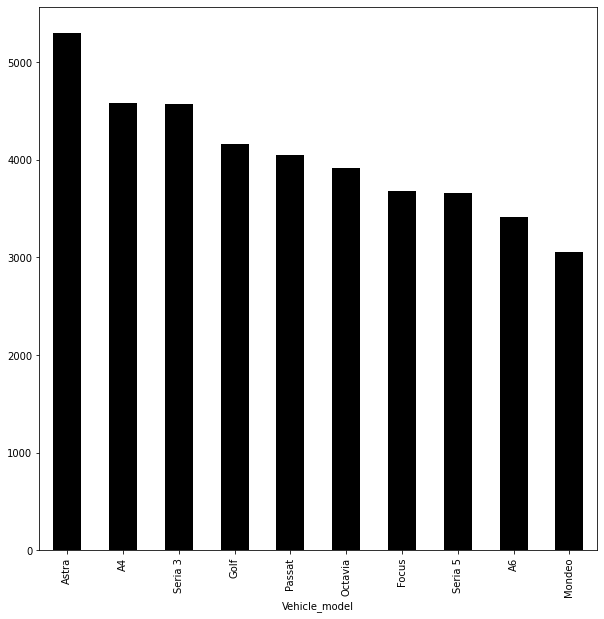

In [ ]:
df.groupby('Vehicle_model')['Index'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,10))

Again, top 10 car models belong to European cars except Focus & Mondeo.

Opel Astra (Germany)

Audi A4 (Germany)

BMW Seria 3 (Germany)

Volkswagen Golf (Germany)

Volkswagen Passat (Germany)

Škoda Octavia (Czech Republic)

Ford Focus (USA)

BMW Seria 5 (Germany)

Audi A6 (Germany)

Ford Mondeo (USA)

We should also note most of these cars were german.

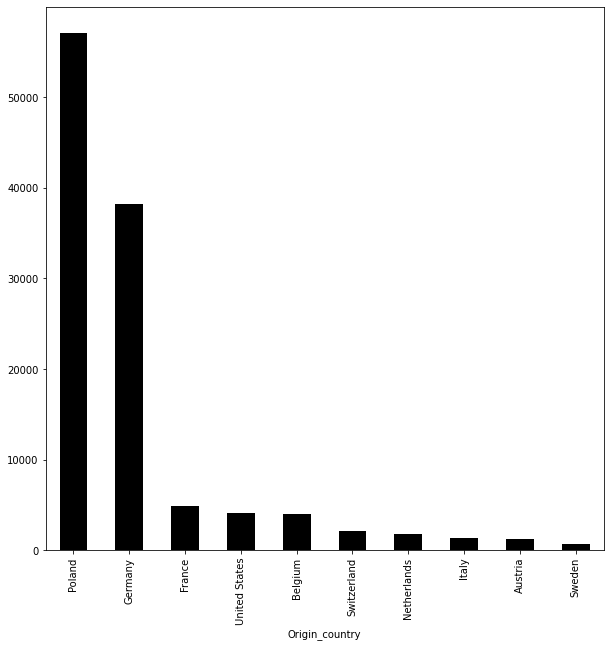

In [ ]:
df.groupby('Origin_country')['Index'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,10))

Those results are not congruent with our previous findings, because there were no polish brands for sale ; unless the meaning of 'Origin country' is the country in which the car is in.

###Publication Date

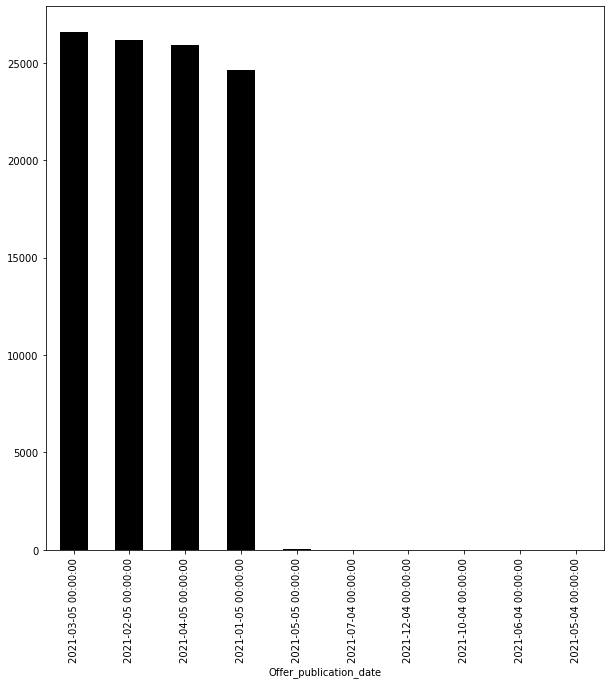

In [ ]:
df.groupby('Offer_publication_date')['Index'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,10))

One would expect publication dates to be spread out across many different dates. In this case, they're primarily spread across 4:

2021-03-05 , 2021-02-05, 2021-04-05 and 2021-01-05 [The first 5 days of May in Poland
]

What does this information tell us? What is so special about those dates?


***Theory:*** Offers were published on those days in particular because they were national holidays, therefore more people would see them as they have more free time.

May first is Labour day, May 3rd is Constitution Day in Poland.

###Horsepower

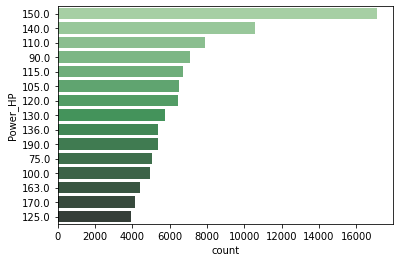

In [ ]:
sns.countplot(y="Power_HP",  data=df, palette="Greens_d",
              order=df.Power_HP.value_counts().iloc[:15].index)

###Car type

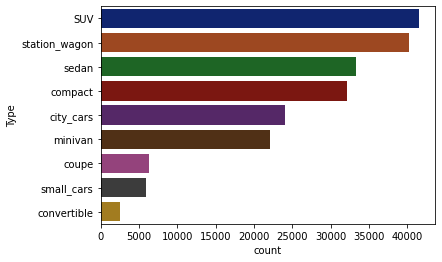

In [ ]:
sns.countplot(y="Type",  data=df, palette="dark",
              order=df.Type.value_counts().iloc[:10].index)

Looks like the poles prefer larger cars

###Year of production

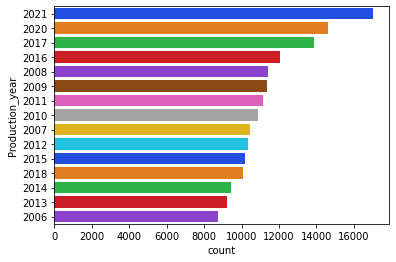

In [ ]:
sns.countplot(y="Production_year",  data=df, palette="bright",
              order=df.Production_year.value_counts().iloc[:15].index)

##Relationships

### Fuel type and CO2 Emissions

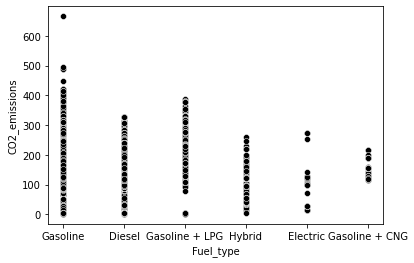

In [ ]:
sns.scatterplot(data=df[(df['CO2_emissions'] < 1.000000e+05)], x='Fuel_type', y='CO2_emissions');

The data does make sense, because hybrid cars and electric especially should produce less emissions.

###Horsepower and CO2 emissions

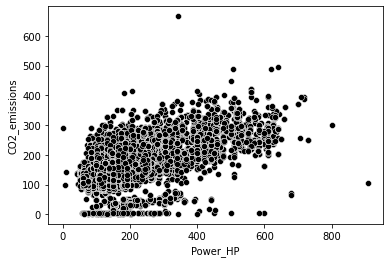

In [ ]:
sns.scatterplot(data=df[(df['CO2_emissions'] < 1.000000e+05)], x='Power_HP', y='CO2_emissions');

We do not find a direct relationship between horsepower and CO2 emissions. Intuition would imply greater horsepower means more emissions.

### Price and Car type

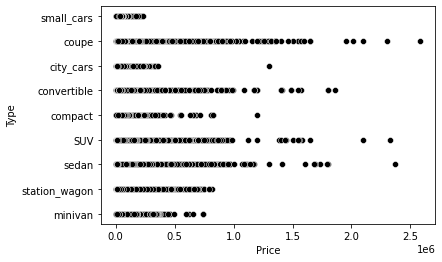

In [ ]:
sns.scatterplot(data=df[(df['Price'] < 3.000000e+06)], x='Price', y='Type');

While this does indicate there is very little correlation between the two columns, it does show that the most expensice cars tend to be coupes, SUVs and certain sedans.

#Research Questions

##What attributes contribute the most to a car's value?

In [ ]:
print(df.corr())

                     Index     Price  Production_year  Mileage_km  Power_HP  \
Index             1.000000 -0.106673         0.016147    0.002486 -0.230309   
Price            -0.106673  1.000000         0.441425   -0.017728  0.639611   
Production_year   0.016147  0.441425         1.000000   -0.040357  0.171025   
Mileage_km        0.002486 -0.017728        -0.040357    1.000000 -0.003709   
Power_HP         -0.230309  0.639611         0.171025   -0.003709  1.000000   
Displacement_cm3 -0.205173  0.350695        -0.155432    0.006601  0.795607   
CO2_emissions    -0.003739 -0.001300        -0.007817    0.004679  0.012352   
Doors_number      0.073687 -0.034275         0.252298   -0.006846 -0.139202   

                  Displacement_cm3  CO2_emissions  Doors_number  
Index                    -0.205173      -0.003739      0.073687  
Price                     0.350695      -0.001300     -0.034275  
Production_year          -0.155432      -0.007817      0.252298  
Mileage_km              

As we can see from the previous code, price correlates the most with horsepower (0.639611), followed by production year (0.441425).

###Price and horsepower

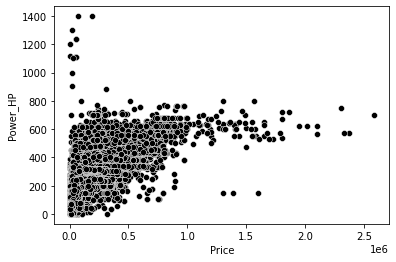

In [ ]:
sns.scatterplot(data=df[(df['Price'] < 3.000000e+06)], x='Price', y='Power_HP');

### Price and production year

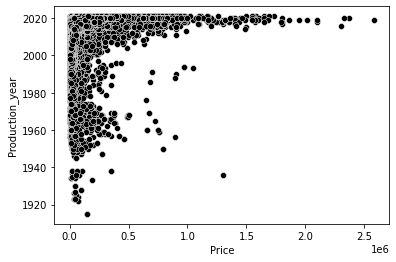

In [ ]:
sns.scatterplot(data=df[(df['Price'] < 3.000000e+06)], x='Price', y='Production_year');

##What preferences do poles have when it comes to car ads? What would make them more likely to purchase?

We have already identified a few answers to that question in the previous section, however here are a few reminders:

1) They prefer *European* brands over others, especially *German* brands.

2) They prefer **more recent** production years over older models by a little margin, especially those made in the same year of the purchase.

3) They prefer larger cars, especiallt SUVs and wagons. (which also implies more car doors on average)